[Reference](https://wire.insiderfinance.io/stock-price-prediction-using-machine-learning-34d35d6922d)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Sanazorgui/Stock-Price-Prediction/main/data/tesla.csv", low_memory = False, parse_dates=["Date"], infer_datetime_format=True)

In [3]:
# Checking for missing data
df.isna().sum()
# Checking for non-numerical data
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

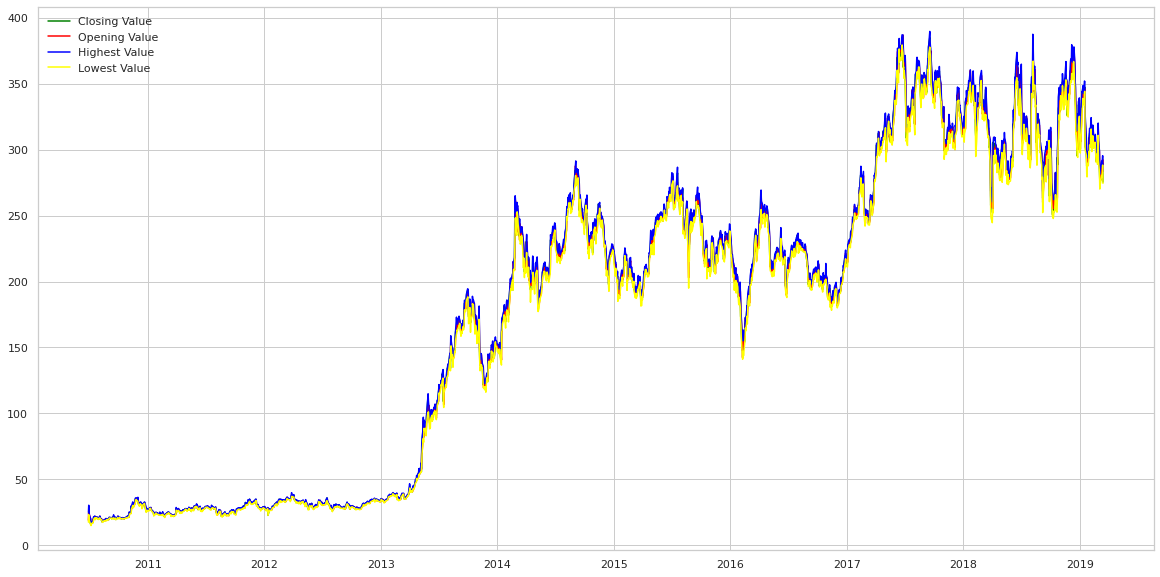

In [7]:
# Data visualization
sns.set_theme(style= "whitegrid")
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(df.Date, df.Close, color = 'green', label = "Closing Value");
ax.plot(df.Date, df.Open,  color='red', label = "Opening Value");
ax.plot(df.Date, df.High, color='blue', label="Highest Value");
ax.plot(df.Date, df.Low, color='yellow', label="Lowest Value");
ax.legend(loc='upper left' ,frameon=False);

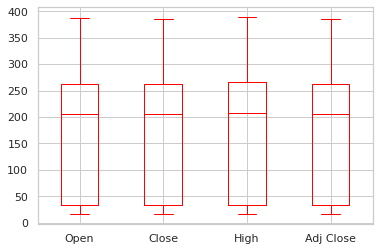

In [8]:
# Candlestick plot 
df[["Open","Close","High","Adj Close"]].plot(kind="box",color ="red");

In [19]:
# Creating a copy of the DataFrame
df2 = df.copy()

In [20]:
# Sorting the data frame by Date 
df2.sort_values(by=["Date"],inplace=True,ascending=True)
df2.head()
#Creating a function to add Datetime parameters for a better prediction
def add_date_params(df,Date):
    """
    Adding different Date time parameters for the time series DataFrame
    """
    df["Year"] = df.Date.dt.year
    df["Month"] = df.Date.dt.month
    df["Day"] = df.Date.dt.day
    df["Day_Of_Year"] = df.Date.dt.dayofyear
    df["Week_Of_Year"] = df.Date.dt.isocalendar().week.astype(np.int64)
    # The day of the week with Monday=0 to Sunday=6
    df["Day_Of_Week"] = df.Date.dt.dayofweek
    df.drop("Date",axis=1,inplace=True)
    return df

In [21]:
Date=df2.Date
add_date_params(df2,Date)
df2.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Day_Of_Year,Week_Of_Year,Day_Of_Week
0,19.000000,25.00,17.540001,23.889999,23.889999,18766300,2010,6,29,180,26,1
1,25.790001,30.42,23.299999,23.830000,23.830000,17187100,2010,6,30,181,26,2
2,25.000000,25.92,20.270000,21.959999,21.959999,8218800,2010,7,1,182,26,3
3,23.000000,23.10,18.709999,19.200001,19.200001,5139800,2010,7,2,183,26,4
4,20.000000,20.00,15.830000,16.110001,16.110001,6866900,2010,7,6,187,27,1


In [22]:
# A function to search for duplicates in any pandas DataFrame
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns 
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at index 'x'.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from index (x+1) till the last column
        for y in range(x + 1, df.shape[1]):
            otherCol = df.iloc[:, y]
            # test if the two selected columns are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

In [23]:
df2.rename(columns ={"Adj Close":"ADJ"},inplace = True)
df2.head()

,Open,High,Low,Close,ADJ,Volume,Year,Month,Day,Day_Of_Year,Week_Of_Year,Day_Of_Week
0,19.000000,25.00,17.540001,23.889999,23.889999,18766300,2010,6,29,180,26,1
1,25.790001,30.42,23.299999,23.830000,23.830000,17187100,2010,6,30,181,26,2
2,25.000000,25.92,20.270000,21.959999,21.959999,8218800,2010,7,1,182,26,3
3,23.000000,23.10,18.709999,19.200001,19.200001,5139800,2010,7,2,183,26,4
4,20.000000,20.00,15.830000,16.110001,16.110001,6866900,2010,7,6,187,27,1


In [24]:
getDuplicateColumns(df2)

['ADJ']

In [25]:
# Deleting the duplicate columns
df2.drop("ADJ",axis=1,inplace=True)
df2.head()

,Open,High,Low,Close,Volume,Year,Month,Day,Day_Of_Year,Week_Of_Year,Day_Of_Week
0,19.000000,25.00,17.540001,23.889999,18766300,2010,6,29,180,26,1
1,25.790001,30.42,23.299999,23.830000,17187100,2010,6,30,181,26,2
2,25.000000,25.92,20.270000,21.959999,8218800,2010,7,1,182,26,3
3,23.000000,23.10,18.709999,19.200001,5139800,2010,7,2,183,26,4
4,20.000000,20.00,15.830000,16.110001,6866900,2010,7,6,187,27,1


In [26]:
# Creating a correlation matrix of the DataFrame
correlation_matrix = df2.corr()
correlation_matrix

,Open,High,Low,Close,Volume,Year,Month,Day,Day_Of_Year,Week_Of_Year,Day_Of_Week
Open,1.000000,0.999578,0.999566,0.999054,0.457938,0.920494,-0.000987,0.005597,-0.001360,0.003145,-0.000750
High,0.999578,1.000000,0.999490,0.999631,0.466999,0.921259,-0.002066,0.004730,-0.002507,0.002200,-0.003297
Low,0.999566,0.999490,1.000000,0.999580,0.448387,0.920112,-0.001177,0.006909,-0.001433,0.003027,0.000294
Close,0.999054,0.999631,0.999580,1.000000,0.458157,0.920846,-0.002070,0.005874,-0.002410,0.002242,-0.002297
Volume,0.457938,0.466999,0.448387,0.458157,1.000000,0.423072,-0.014579,-0.070819,-0.021447,-0.011711,-0.023801
Year,0.920494,0.921259,0.920112,0.920846,0.423072,1.000000,-0.144177,-0.007298,-0.144212,-0.139127,0.003431
Month,-0.000987,-0.002066,-0.001177,-0.002070,-0.014579,-0.144177,1.000000,0.004917,0.996550,0.979165,-0.014138
Day,0.005597,0.004730,0.006909,0.005874,-0.070819,-0.007298,0.004917,1.000000,0.087596,0.069207,-0.006365
Day_Of_Year,-0.001360,-0.002507,-0.001433,-0.002410,-0.021447,-0.144212,0.996550,0.087596,1.000000,0.981123,-0.014496
Week_Of_Year,0.003145,0.002200,0.003027,0.002242,-0.011711,-0.139127,0.979165,0.069207,0.981123,1.000000,-0.016440


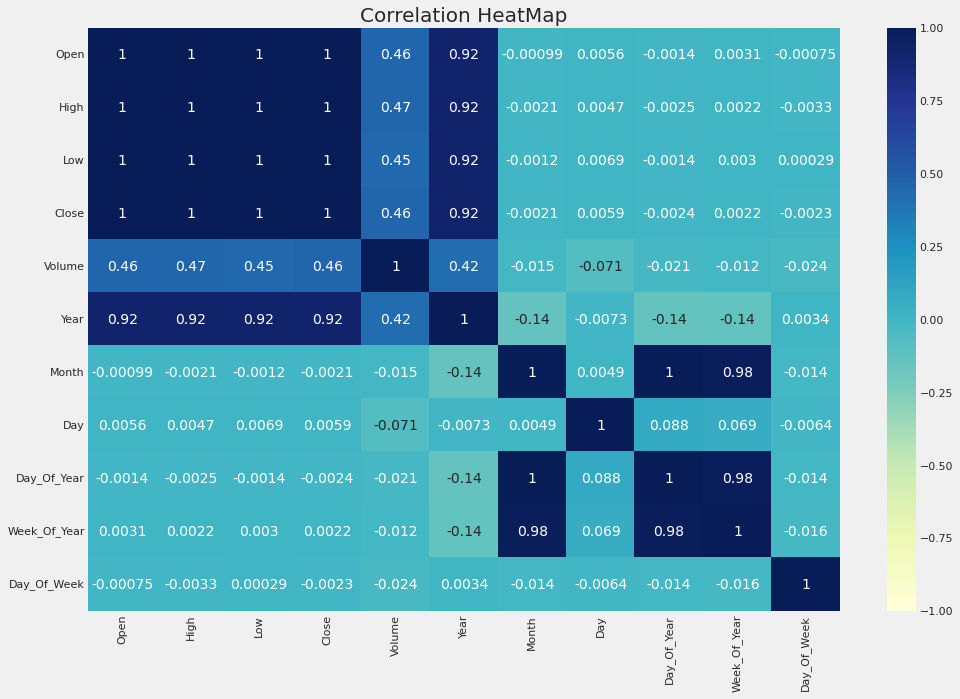

In [27]:
# Visualizing the Correlation Matrix in a Seaborn heatmap
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(correlation_matrix,annot=True,cmap="YlGnBu",vmin=-1, vmax=1)
ax.set_title("Correlation HeatMap", fontsize=20);

# Modelling

In [28]:
np.random.seed(19)
df2.head()

,Open,High,Low,Close,Volume,Year,Month,Day,Day_Of_Year,Week_Of_Year,Day_Of_Week
0,19.000000,25.00,17.540001,23.889999,18766300,2010,6,29,180,26,1
1,25.790001,30.42,23.299999,23.830000,17187100,2010,6,30,181,26,2
2,25.000000,25.92,20.270000,21.959999,8218800,2010,7,1,182,26,3
3,23.000000,23.10,18.709999,19.200001,5139800,2010,7,2,183,26,4
4,20.000000,20.00,15.830000,16.110001,6866900,2010,7,6,187,27,1


In [30]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [31]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import svm
import xgboost as xgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [32]:
# Splitting the Data into training and test sets
test_set = df2[df2.Year == 2019]
train_set = df2[df2.Year !=2019]
# Split data into X (features) and y (labels) 
X_train, y_train = train_set.drop("Close",axis=1), train_set.Close
X_test, y_test = test_set.drop("Close",axis=1), test_set.Close

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2142, 10), (2142,), (51, 10), (51,))

In [33]:
models = {
           'RF': RandomForestRegressor(),
           'KNN': KNeighborsRegressor(),
           'Linear regression': LinearRegression(),
           'SVM Regressor': SVR(),
           'ADABOOST Regressor': AdaBoostRegressor(),
           'XGB': XGBRegressor(),
           'CatBoost': CatBoostRegressor(),
           'BayesianRidge': linear_model.BayesianRidge()
    }
# Creating a function to test several baseline methods at the same time
def baseline_models (models,X_train,y_train,X_test,y_test):
   
    results = {}
    for modelname, model in models.items():
        model.fit(X_train, y_train)
        # The metric used is r^2 
        results[modelname] = model.score(X_test, y_test) 
    
    return results

In [34]:
results = baseline_models (models,X_train,y_train,X_test,y_test)

[11:59:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.046179
0:	learn: 110.2183167	total: 53.2ms	remaining: 53.1s
1:	learn: 105.2940686	total: 55.8ms	remaining: 27.8s
2:	learn: 100.6169032	total: 63.2ms	remaining: 21s
3:	learn: 96.2936049	total: 65.6ms	remaining: 16.3s
4:	learn: 92.0240263	total: 68.9ms	remaining: 13.7s
5:	learn: 87.9905009	total: 73.9ms	remaining: 12.2s
6:	learn: 84.1648926	total: 81ms	remaining: 11.5s
7:	learn: 80.5489305	total: 94.5ms	remaining: 11.7s
8:	learn: 77.0165425	total: 101ms	remaining: 11.1s
9:	learn: 73.6493396	total: 106ms	remaining: 10.5s
10:	learn: 70.4865018	total: 112ms	remaining: 10.1s
11:	learn: 67.4341957	total: 121ms	remaining: 9.94s
12:	learn: 64.5446032	total: 124ms	remaining: 9.43s
13:	learn: 61.7875180	total: 126ms	remaining: 8.88s
14:	learn: 59.0782660	total: 129ms	remaining: 8.44s
15:	learn: 56.5407992	total: 132ms	remaining: 8.09s
16:	learn: 54.

In [35]:
results

{'ADABOOST Regressor': 0.9395688163921281,
 'BayesianRidge': 0.9799917657176713,
 'CatBoost': 0.9544054748272428,
 'KNN': -14.87253460140302,
 'Linear regression': 0.9798371159615205,
 'RF': 0.9647932430180404,
 'SVM Regressor': -17.69933011671753,
 'XGB': 0.9561602857215081}

In [36]:
# Putting the model results in a separated DataFrame
comparaison = pd.DataFrame(results, index=["R^2"])
comparaison.head()

,RF,KNN,Linear regression,SVM Regressor,ADABOOST Regressor,XGB,CatBoost,BayesianRidge
R^2,0.964793,-14.872535,0.979837,-17.69933,0.939569,0.95616,0.954405,0.979992


,RF,KNN,Linear regression,SVM Regressor,ADABOOST Regressor,XGB,CatBoost,BayesianRidge
R^2,0.964793,-14.872535,0.979837,-17.69933,0.939569,0.95616,0.954405,0.979992


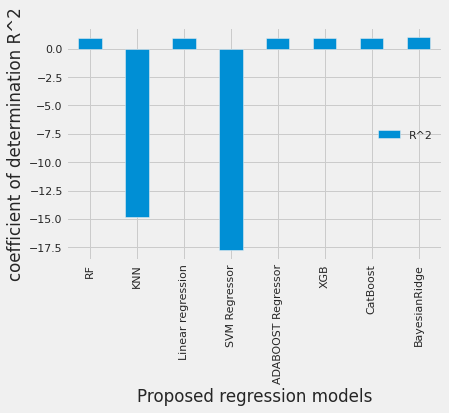

In [37]:
# Visulazing the DataFrame in a bar plot
plt = comparaison.T.plot.bar();
plt.set_xlabel('Proposed regression models')
plt.set_ylabel('coefficient of determination R^2')
plt.legend(frameon=False,bbox_to_anchor = (1, 0.6));
comparaison.head()

In [38]:
# A different bar plot with labels 
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]/2, y[i], ha = 'center',c='darkgoldenrod')

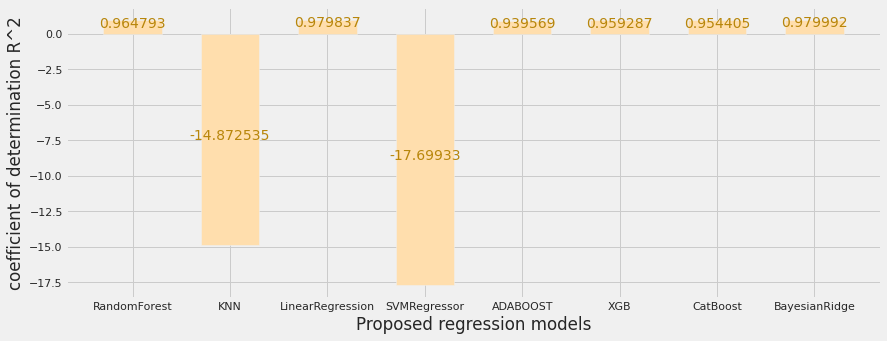

In [43]:
import matplotlib.pyplot as plt

x = ["RandomForest", "KNN", "LinearRegression", "SVMRegressor", "ADABOOST","XGB", "CatBoost","BayesianRidge"]
y = [0.964793 , -14.872535 , 0.979837 , -17.69933, 0.939569 , 0.959287 , 0.954405, 0.979992]
# plt.figure(figsize = (13, 5))
#making the bar chart on the data
fig = plt.figure(figsize=(13, 5))
plt.bar(x, y, width = 0.6,color = 'navajowhite')
plt.xlabel('Proposed regression models')
plt.ylabel('coefficient of determination R^2')
# calling the function to add value labels
addlabels(x,y);

In [44]:
from sklearn.model_selection import RandomizedSearchCV
CatB_grid = {"depth": np.arange(4,12,2),
             "learning_rate": np.arange(0.01,1,0.01),
             "iterations" : np.arange(20,100,10)
            }

In [45]:
%%time 
# Instantiate The CatBoost model with RandomizedSearchCV
CatB_model = RandomizedSearchCV(CatBoostRegressor(),
                                random_state=19,
                                n_jobs = -1,
                                param_distributions = CatB_grid,
                                n_iter = 100,
                                cv=5,
                                verbose = True)
# Fit the RandomizedSearchCV model
CatB_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
0:	learn: 83.7501531	total: 1.35ms	remaining: 92.9ms
1:	learn: 61.2925778	total: 2.32ms	remaining: 78.8ms
2:	learn: 45.0139809	total: 3.61ms	remaining: 80.7ms
3:	learn: 33.3198615	total: 4.88ms	remaining: 80.5ms
4:	learn: 25.4322782	total: 5.81ms	remaining: 75.6ms
5:	learn: 19.7258144	total: 6.75ms	remaining: 72ms
6:	learn: 15.8831073	total: 7.66ms	remaining: 68.9ms
7:	learn: 13.2604949	total: 8.61ms	remaining: 66.7ms
8:	learn: 11.8223806	total: 9.53ms	remaining: 64.6ms
9:	learn: 10.4297395	total: 10.5ms	remaining: 62.8ms
10:	learn: 9.4644727	total: 11.4ms	remaining: 61.2ms
11:	learn: 8.9438907	total: 12.3ms	remaining: 59.7ms
12:	learn: 8.6344655	total: 13.3ms	remaining: 58.1ms
13:	learn: 8.1246792	total: 14.2ms	remaining: 56.8ms
14:	learn: 7.6448481	total: 15.1ms	remaining: 55.5ms
15:	learn: 7.1866834	total: 16.1ms	remaining: 54.2ms
16:	learn: 6.9571846	total: 17ms	remaining: 53ms
17:	learn: 6.6638786	total: 17.9ms	remaini

In [46]:
CatB_model.best_params_

{'depth': 4, 'iterations': 70, 'learning_rate': 0.3}

In [47]:
CatBoost_best_model = CatBoostRegressor(learning_rate=0.3, iterations = 70, depth = 4)
CatBoost_best_model.fit(X_train,y_train)

0:	learn: 83.7501531	total: 1.99ms	remaining: 137ms
1:	learn: 61.2925778	total: 3.64ms	remaining: 124ms
2:	learn: 45.0139809	total: 4.89ms	remaining: 109ms
3:	learn: 33.3198615	total: 6.13ms	remaining: 101ms
4:	learn: 25.4322782	total: 7.56ms	remaining: 98.3ms
5:	learn: 19.7258144	total: 8.81ms	remaining: 94ms
6:	learn: 15.8831073	total: 10.1ms	remaining: 90.6ms
7:	learn: 13.2604949	total: 11.3ms	remaining: 87.7ms
8:	learn: 11.8223806	total: 12.6ms	remaining: 85.2ms
9:	learn: 10.4297395	total: 13.8ms	remaining: 82.9ms
10:	learn: 9.4644727	total: 15.3ms	remaining: 82.1ms
11:	learn: 8.9438907	total: 16.6ms	remaining: 80.1ms
12:	learn: 8.6344655	total: 17.9ms	remaining: 78.3ms
13:	learn: 8.1246792	total: 19.1ms	remaining: 76.6ms
14:	learn: 7.6448481	total: 20.4ms	remaining: 74.8ms
15:	learn: 7.1866834	total: 21.6ms	remaining: 73ms
16:	learn: 6.9571846	total: 22.9ms	remaining: 71.4ms
17:	learn: 6.6638786	total: 24.2ms	remaining: 69.8ms
18:	learn: 6.3497416	total: 25.4ms	remaining: 68.2ms
1

In [48]:
random_forest_grid ={ "n_estimators" : np.arange(10,100,10),
          "max_depth" : [None,3,5,10],
          "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf" : np.arange(1,20,2),
          "max_features" : [0.5,1, "sqrt" , "auto"],
          }

In [49]:
Random_forest_model = RandomizedSearchCV(RandomForestRegressor(),
                                random_state=19,
                                n_jobs = -1,
                                param_distributions = random_forest_grid,
                                n_iter = 100,
                                cv=5,
                                verbose = True)
# Fit the RandomizedSearchCV model
Random_forest_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=19, verbose=True)

In [50]:
Random_forest_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 18,
 'n_estimators': 50}

In [51]:
Random_forest_best_model = RandomForestRegressor( n_estimators = 30, min_samples_split = 12,min_samples_leaf=3,
                                                max_features= 'auto', max_depth = None)
Random_forest_best_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=3, min_samples_split=12, n_estimators=30)

In [52]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

In [53]:
# Creating an evaluation function for RMSLE
def RMSLE(y_test,y_predicted):
    """
    Calculates the RMSLE (Root Mean Squared Log Error) between model predictions and true values.
    """
    return np.sqrt(mean_squared_log_error(y_test,y_predicted))

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
# Creating a function with several evaluation metrics
def evaluating_reg_models(model):
    test_preds = model.predict(X_test)
    scores = {"MAE" : mean_absolute_error(y_test,test_preds),
             "RMSLE" : RMSLE(y_test,test_preds),
             "MSE" : mean_squared_error(y_test,test_preds),
             "R^2" : r2_score(y_test,test_preds),
             "RMSE": mean_squared_error(y_test,test_preds,squared=False),
             "MSLE": mean_squared_log_error(y_test,test_preds)}
    return scores

In [58]:
evaluating_reg_models(CatBoost_best_model)

{'MAE': 4.601509929442768,
 'MSE': 30.985590635305122,
 'MSLE': 0.00033790374084443644,
 'RMSE': 5.566470213277452,
 'RMSLE': 0.018382158220525587,
 'R^2': 0.9199182124313414}

In [59]:
evaluating_reg_models(Random_forest_best_model)

{'MAE': 2.9741392265277704,
 'MSE': 15.140867862296691,
 'MSLE': 0.0001594635739344678,
 'RMSE': 3.891126811387248,
 'RMSLE': 0.012627888736224587,
 'R^2': 0.9608686573696602}

In [60]:
CatBoost_best_model.feature_importances_

array([6.95011458e+00, 7.37837249e+00, 1.65128802e+01, 4.59036086e+00,
       6.42233703e+01, 1.58706516e-01, 4.91086276e-02, 8.56775955e-02,
       4.44681370e-02, 6.94069003e-03])

In [61]:
Random_forest_best_model.feature_importances_

array([5.33696094e-03, 7.94768823e-01, 1.99803448e-01, 2.80743537e-05,
       4.19128170e-06, 9.17058726e-06, 1.38867791e-05, 1.73915709e-05,
       9.20977378e-06, 8.84415534e-06])

In [62]:
# Helper function for plottin feature importance
def plot_features(columns, importances, n=20):
    df= (pd.DataFrame({"features": columns,
                      "feature_importances": importances})
        .sort_values("feature_importances",ascending = False)
        .reset_index(drop=True))
    
    #Plot the dataframe
    fig,ax=plt.subplots()
    ax.barh(df["features"][:n],df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

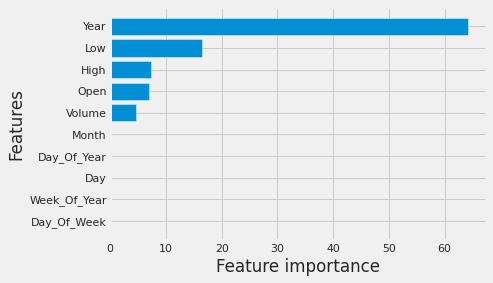

In [63]:
plot_features(X_train.columns, CatBoost_best_model.feature_importances_)

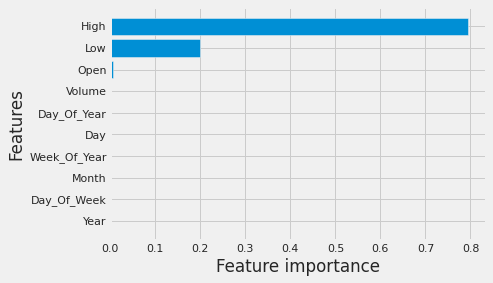

In [64]:
plot_features(X_train.columns, Random_forest_best_model.feature_importances_)